In [3]:
import numpy as np
from sklearn import cluster
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [4]:
def create_data(centers,num=100,std=0.7):
    '''
    生成用于聚类的数据集

    :param centers: 聚类的中心点组成的数组。如果中心点是二维的，则产生的每个样本都是二维的。
    :param num: 样本数
    :param std: 每个簇中样本的标准差
    :return: 用于聚类的数据集。是一个元组，第一个元素为样本集，第二个元素为样本集的真实簇分类标记
    '''
    X, labels_true = make_blobs(n_samples=num, centers=centers, cluster_std=std)
    return  X,labels_true

In [5]:
def plot_data(*data):
    X,labels_true=data
    labels=np.unique(labels_true)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors='rgbyckm' # 每个簇的样本标记不同的颜色
    for i,label in enumerate(labels):
        position=labels_true==label
        ax.scatter(X[position,0],X[position,1],label="cluster %d"%label,
        color=colors[i%len(colors)])

    ax.legend(loc="best",framealpha=0.5)
    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[1]")
    ax.set_title("data")
    plt.show()

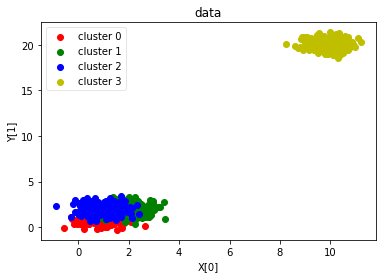

In [6]:
centers=[[1,1],[2,2],[1,2],[10,20]] # 用于产生聚类的中心点
X,labels_true=create_data(centers,1000,0.5) # 产生用于聚类的数据集
plot_data(X,labels_true) # 绘制用于聚类的数据集

In [9]:
def test_Kmeans(*data):
    
    X,labels_true=data
    clst=cluster.KMeans()
    clst.fit(X)
    predicted_labels=clst.predict(X)
    print("ARI:%s"% adjusted_rand_score(labels_true,predicted_labels))
    print("Sum center distance %s"%clst.inertia_)

test_Kmeans(X,labels_true)

ARI:0.3549181322515079
Sum center distance 242.29693177765319


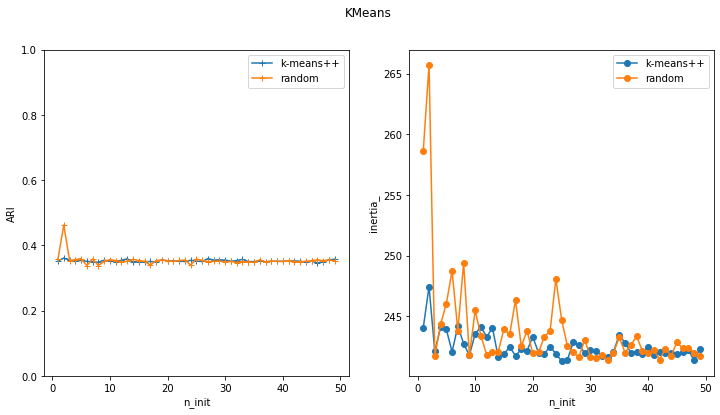

In [11]:
def test_Kmeans_n_init(*data):

    X,labels_true=data
    nums=range(1,50)
    
    ## 绘图
    fig=plt.figure(figsize=(12, 6))

    ARIs_k=[]; Distances_k=[]
    ARIs_r=[]; Distances_r=[]
    for num in nums:
            clst=cluster.KMeans(n_init=num,init='k-means++')
            clst.fit(X)
            predicted_labels=clst.predict(X)
            ARIs_k.append(adjusted_rand_score(labels_true,predicted_labels))
            Distances_k.append(clst.inertia_)

            clst=cluster.KMeans(n_init=num,init='random')
            clst.fit(X)
            predicted_labels=clst.predict(X)
            ARIs_r.append(adjusted_rand_score(labels_true,predicted_labels))
            Distances_r.append(clst.inertia_)

    ax=fig.add_subplot(1,2,1)
    ax.plot(nums,ARIs_k,marker="+",label="k-means++")
    ax.plot(nums,ARIs_r,marker="+",label="random")
    ax.set_xlabel("n_init")
    ax.set_ylabel("ARI")
    ax.set_ylim(0,1)
    ax.legend(loc='best')
    ax=fig.add_subplot(1,2,2)
    ax.plot(nums,Distances_k,marker='o',label="k-means++")
    ax.plot(nums,Distances_r,marker='o',label="random")
    ax.set_xlabel("n_init")
    ax.set_ylabel("inertia_")
    ax.legend(loc='best')

    fig.suptitle("KMeans")
    plt.show()

test_Kmeans_n_init(X, labels_true)

## 密度聚类

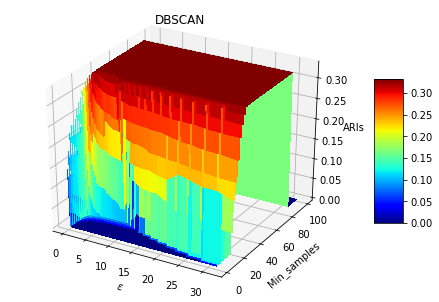

In [41]:
from sklearn import  cluster

def test_DBSCAN_epsilon(*data):
    X,labels_true=data
    epsilons=np.logspace(-1,1.5); min_samples=range(1,100)
    ARIs=[]; Core_nums=[]
    
    for epsilon in epsilons:
        for num in min_samples:
            clst=cluster.DBSCAN(eps=epsilon, min_samples=num)
            predicted_labels=clst.fit_predict(X)
            ARIs.append(adjusted_rand_score(labels_true,predicted_labels))
            Core_nums.append(len(clst.core_sample_indices_))
            
    
    ## 绘图
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    
    
    epsilons, min_samples = np.meshgrid(epsilons, min_samples)
    ARIs = np.array(ARIs).reshape(epsilons.shape)
    Core_nums = np.array(Core_nums).reshape(epsilons.shape)
    fig=plt.figure()
    
    ax=Axes3D(fig)
    surf = ax.plot_surface(epsilons, min_samples, ARIs, rstride=1, cstride=1, cmap=cm.jet,
        linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel(r"$\epsilon$")
    ax.set_ylabel('Min_samples')
    ax.set_zlabel("ARIs")
    ax.set_title("DBSCAN")
    plt.show()
    
test_DBSCAN_epsilon(X, labels_true)

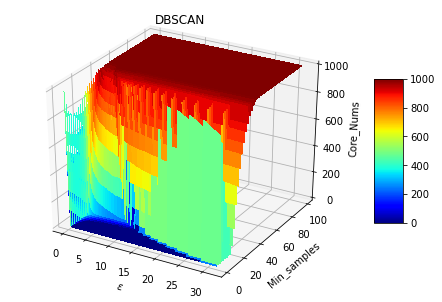

In [42]:
from sklearn import  cluster

def test_DBSCAN_epsilon(*data):
    X,labels_true=data
    epsilons=np.logspace(-1,1.5); min_samples=range(1,100)
    ARIs=[]; Core_nums=[]
    
    for epsilon in epsilons:
        for num in min_samples:
            clst=cluster.DBSCAN(eps=epsilon, min_samples=num)
            predicted_labels=clst.fit_predict(X)
            ARIs.append(adjusted_rand_score(labels_true,predicted_labels))
            Core_nums.append(len(clst.core_sample_indices_))
            
    
    ## 绘图
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    
    
    epsilons, min_samples = np.meshgrid(epsilons, min_samples)
    ARIs = np.array(ARIs).reshape(epsilons.shape)
    Core_nums = np.array(Core_nums).reshape(epsilons.shape)
    fig=plt.figure()
    
    ax=Axes3D(fig)
    surf = ax.plot_surface(epsilons, min_samples, Core_nums, rstride=1, cstride=1, cmap=cm.jet,
        linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel(r"$\epsilon$")
    ax.set_ylabel('Min_samples')
    ax.set_zlabel("Core_Nums")
    ax.set_title("DBSCAN")
    plt.show()
    
test_DBSCAN_epsilon(X, labels_true)

## 层次聚类

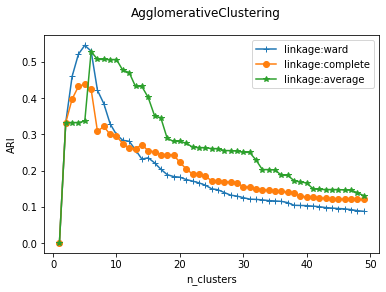

In [17]:
def test_AgglomerativeClustering_linkage(*data):
    '''
    测试 AgglomerativeClustering 的聚类结果随链接方式的影响

    :param data:  可变参数。它是一个元组。元组元素依次为：第一个元素为样本集，第二个元素为样本集的真实簇分类标记
    :return: None
    '''
    X,labels_true=data
    nums=range(1,50)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    linkages=['ward','complete','average']
    markers="+o*"
    for i, linkage in enumerate(linkages):
        ARIs=[]
        for num in nums:
            clst=cluster.AgglomerativeClustering(n_clusters=num,linkage=linkage)
            predicted_labels=clst.fit_predict(X)
            ARIs.append(adjusted_rand_score(labels_true,predicted_labels))
        ax.plot(nums,ARIs,marker=markers[i],label="linkage:%s"%linkage)

    ax.set_xlabel("n_clusters")
    ax.set_ylabel("ARI")
    ax.legend(loc="best")
    fig.suptitle("AgglomerativeClustering")
    plt.show()

test_AgglomerativeClustering_linkage(X, labels_true)

## GMM

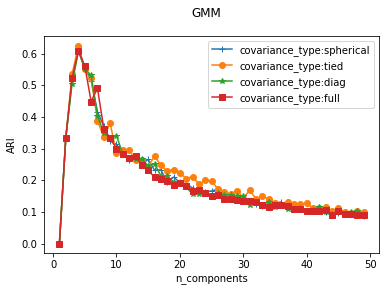

In [27]:
from sklearn import mixture

def test_GMM_cov_type(*data):
    X,labels_true=data
    nums=range(1,50)

    cov_types=['spherical','tied','diag','full']
    markers="+o*s"
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    for i ,cov_type in enumerate(cov_types):
        ARIs=[]
        for num in nums:
            clst=mixture.GaussianMixture(n_components=num,covariance_type=cov_type)
            clst.fit(X)
            predicted_labels=clst.predict(X)
            ARIs.append(adjusted_rand_score(labels_true,predicted_labels))
        ax.plot(nums,ARIs,marker=markers[i],label="covariance_type:%s"%cov_type)

    ax.set_xlabel("n_components")
    ax.legend(loc="best")
    ax.set_ylabel("ARI")
    fig.suptitle("GMM")
    plt.show()
    
test_GMM_cov_type(X, labels_true)

KMeans：通用聚类方法，用于均匀的簇的大小、簇数量不多的情况

DBSCAN：用于不均匀的簇的大小，以及非平坦的集合结构

层次聚类：用于簇的数量较多，有连接约束的情况

GMM算法：用于平坦的集合结构，对密度估计很合适